<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Belambus_Selatan/Belambus_Selatan_BRK_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_belambus_selatan"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [ ]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_belambus_selatan
Rows: 855
Columns: 16
Shape: (855, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
0.37732601165771484

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,855.0,5.922185,3.674509,0.000000,3.000000,6.000000,8.675000,17.000000
To,855.0,6.635050,3.670369,0.300000,3.740000,6.400000,9.000000,18.000000
Interval,855.0,0.712865,0.294277,0.120000,0.450000,0.700000,1.000000,1.500000
CoreRec,855.0,0.991234,0.124041,0.260000,1.000000,1.000000,1.000000,3.100000
WetW,855.0,3.850371,1.839270,0.400000,2.295000,3.820000,5.206500,10.265000
H2O,855.0,23.257950,15.081707,0.639000,10.320500,22.187000,34.205500,65.541000
DryW,855.0,3.015953,1.621328,0.245000,1.620000,2.910000,4.309000,8.515000
WTF,855.0,1.869734,0.466007,0.722426,1.581269,1.811992,2.092399,4.652560
DTF,855.0,1.436012,0.438915,0.318491,1.131333,1.440388,1.737027,3.169096



Unique GEN_LYR count: 5
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,469
SAP,165
BRK,163
SAPX,46
LIMX,12



Unique Material count: 22
Top Material value counts:


,count
Material,
YLIM,189
Lim,128
SAP,89
ESAP,85
RLIM,80
BR,44
SPT,36
HGT,35
HSAP,30



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [261]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: BRK
Masukkan Material yang ingin difilter: BR

Filtered rows: 33


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
334,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.75,13.00,0.25,1.00,1.310,20.611,1.040,BR,None,BRK,BRK,1.786423,1.418229
335,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.60,12.00,0.40,0.75,1.690,8.284,1.550,BR,None,BRK,BRK,1.920518,1.761422
336,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.00,12.75,0.75,1.00,3.275,4.885,3.115,BR,None,BRK,BRK,1.488686,1.415956
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.00,14.00,1.00,1.00,5.825,9.270,5.285,BR,None,BRK,BRK,1.985861,1.801764
353,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.60,11.00,0.40,0.75,1.715,8.163,1.575,BR,None,BRK,BRK,1.948928,1.789832
354,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.00,12.00,1.00,1.00,5.580,6.631,5.210,BR,None,BRK,BRK,1.902336,1.776195
355,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.00,13.00,1.00,1.00,5.025,4.080,4.820,BR,None,BRK,BRK,1.713125,1.643236
356,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.00,13.25,0.25,1.00,1.425,4.211,1.365,BR,None,BRK,BRK,1.943246,1.861425
388,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,15.00,16.00,1.00,1.00,5.235,3.629,5.045,BR,None,BRK,BRK,1.784718,1.719943
390,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,16.00,17.00,1.00,1.00,3.575,1.399,3.525,BR,None,BRK,BRK,1.218790,1.201744


# Filter By Interval

Descriptive statistics for Interval:
Count: 33
Mean: 0.867273
Standard Error: 0.043640
Median: 1.0
Mode: 1.0
Standard Deviation: 0.250690
Sample Variance: 0.062845
Kurtosis: 0.572712
Skewness: -1.496527
Range: 0.75
Minimum: 0.25
Maximum: 1.0
Sum: 28.62
Confidence Level (95%): ±0.088891

Bin calculation:
Freedman–Diaconis -> bins: 5, bin width: N/A
Sturges -> bins: 7, bin width: 0.107143


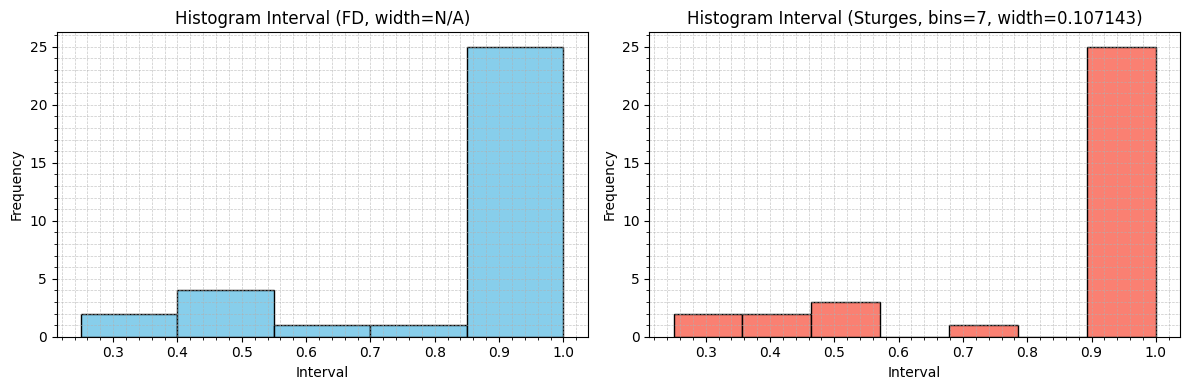


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.25,0.40,2
1,0.40,0.55,4
2,0.55,0.70,1
3,0.70,0.85,1
4,0.85,1.00,25



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.250000,0.357143,2
1,0.357143,0.464286,2
2,0.464286,0.571429,3
3,0.571429,0.678571,0
4,0.678571,0.785714,1
5,0.785714,0.892857,0
6,0.892857,1.000000,25


In [262]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins: {bins_fd}, bin width: {width_fd_str}")
    print(f"Sturges -> bins: {bins_st}, bin width: {width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram Interval (FD, width={width_fd_str})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [263]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.892857
Masukkan batas atas (is less than or equal to): 1

Filtered rows: 25


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.00,5.825,9.270,5.285,BR,None,BRK,BRK,1.985861,1.801764
354,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.00,5.580,6.631,5.210,BR,None,BRK,BRK,1.902336,1.776195
355,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.00,5.025,4.080,4.820,BR,None,BRK,BRK,1.713125,1.643236
388,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,15.0,16.0,1.0,1.00,5.235,3.629,5.045,BR,None,BRK,BRK,1.784718,1.719943
390,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,16.0,17.0,1.0,1.00,3.575,1.399,3.525,BR,None,BRK,BRK,1.218790,1.201744
425,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.00,5.395,3.244,5.220,BR,None,BRK,BRK,1.839265,1.779604
427,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.00,4.890,2.352,4.775,BR,None,BRK,BRK,1.667101,1.627895
441,CS8230825RR,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,0.90,4.165,3.001,4.040,BR,None,BRK,BRK,1.577704,1.530354
442,CS8230825RR,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,0.90,3.275,7.481,3.030,BR,None,BRK,BRK,1.240571,1.147765
443,CS8230825RR,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.00,4.245,5.654,4.005,BR,None,BRK,BRK,1.447207,1.365386


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 25
Mean: 0.974000
Standard Error: 0.011225
Median: 1.0
Mode: 1.0
Standard Deviation: 0.056125
Sample Variance: 0.003150
Kurtosis: 2.477156
Skewness: -1.933653
Range: 0.19999999999999996
Minimum: 0.8
Maximum: 1.0
Sum: 24.35
Confidence Level (95%): ±0.023167

Bin calculation:
Freedman–Diaconis -> bins=5, width=N/A
Sturges -> bins=6, width=0.033333


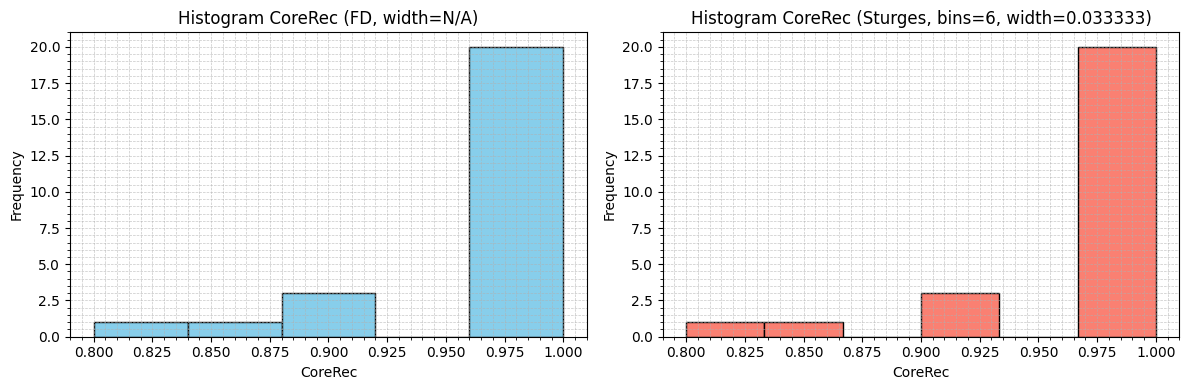


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.80,0.84,1
1,0.84,0.88,1
2,0.88,0.92,3
3,0.92,0.96,0
4,0.96,1.00,20



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.800000,0.833333,1
1,0.833333,0.866667,1
2,0.866667,0.900000,0
3,0.900000,0.933333,3
4,0.933333,0.966667,0
5,0.966667,1.000000,20


In [265]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram CoreRec (FD, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [266]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.966667
Masukkan batas atas (is less than or equal to): 1

Filtered rows: 20


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,5.825,9.270,5.285,BR,None,BRK,BRK,1.985861,1.801764
354,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.580,6.631,5.210,BR,None,BRK,BRK,1.902336,1.776195
355,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.025,4.080,4.820,BR,None,BRK,BRK,1.713125,1.643236
388,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,15.0,16.0,1.0,1.0,5.235,3.629,5.045,BR,None,BRK,BRK,1.784718,1.719943
390,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,16.0,17.0,1.0,1.0,3.575,1.399,3.525,BR,None,BRK,BRK,1.218790,1.201744
425,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.395,3.244,5.220,BR,None,BRK,BRK,1.839265,1.779604
427,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,2.352,4.775,BR,None,BRK,BRK,1.667101,1.627895
443,CS8230825RR,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,4.245,5.654,4.005,BR,None,BRK,BRK,1.447207,1.365386
522,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,5.590,1.610,5.500,BR,None,BRK,BRK,1.905745,1.875062
523,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,14.0,15.0,1.0,1.0,5.310,2.448,5.180,BR,None,BRK,BRK,1.810287,1.765967


# Filter By Wet Weight


Residual IQR acuan:
Q1: -0.311, Q3: 0.252, IQR: 0.564
Lower margin: -1.157, Upper margin: 1.098


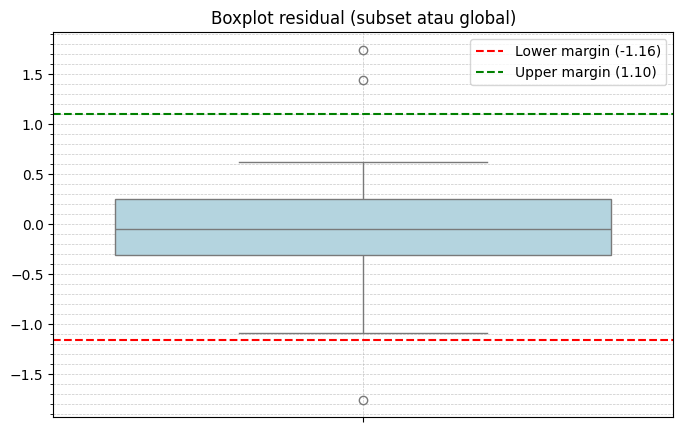

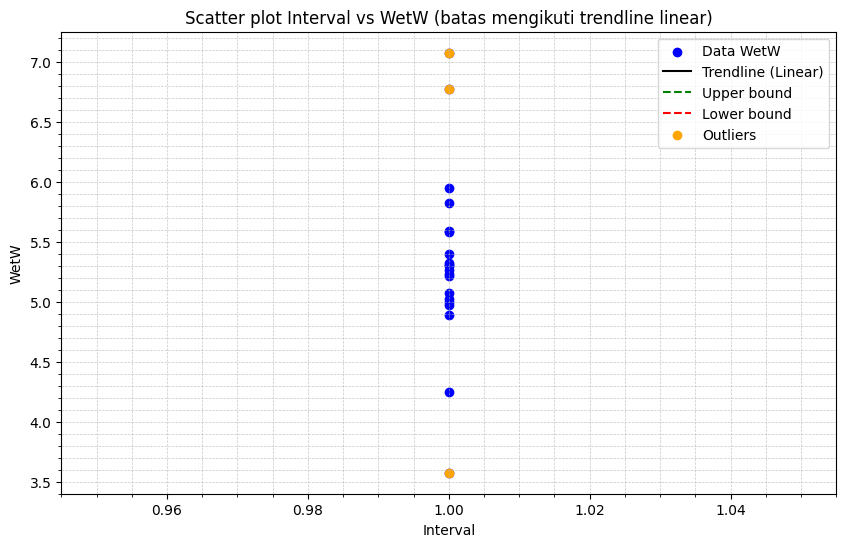


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
        HoleId                       Hill        Hill_Group  From    To  \
390  CS8230819  Belambus Blok 1 Spasi 100  Belambus_Selatan  16.0  17.0   
788  CS8230895  Belambus Blok 1 Spasi 100  Belambus_Selatan  14.0  15.0   
790  CS8230895  Belambus Blok 1 Spasi 100  Belambus_Selatan  13.0  14.0   

     Interval  CoreRec   WetW    H2O   DryW Material Layer NEW_LYR GEN_LYR  \
390       1.0      1.0  3.575  1.399  3.525       BR  None     BRK     BRK   
788       1.0      1.0  7.075  0.848  7.015       BR  None     BRK     BRK   
790       1.0      1.0  6.770  1.108  6.695       BR  None     BRK     BRK   

          WTF       DTF  
390  1.218790  1.201744  
788  2.412012  2.391556  
790  2.308031  2.282462  


In [267]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [268]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-7809237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,5.825,9.270,5.285,BR,None,BRK,BRK,1.985861,1.801764,5.825
354,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.580,6.631,5.210,BR,None,BRK,BRK,1.902336,1.776195,5.580
355,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.025,4.080,4.820,BR,None,BRK,BRK,1.713125,1.643236,5.025
388,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,15.0,16.0,1.0,1.0,5.235,3.629,5.045,BR,None,BRK,BRK,1.784718,1.719943,5.235
390,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,16.0,17.0,1.0,1.0,3.575,1.399,3.525,BR,None,BRK,BRK,1.218790,1.201744,3.575
425,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.395,3.244,5.220,BR,None,BRK,BRK,1.839265,1.779604,5.395
427,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,2.352,4.775,BR,None,BRK,BRK,1.667101,1.627895,4.890
443,CS8230825RR,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,4.245,5.654,4.005,BR,None,BRK,BRK,1.447207,1.365386,4.245
522,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,5.590,1.610,5.500,BR,None,BRK,BRK,1.905745,1.875062,5.590
523,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,14.0,15.0,1.0,1.0,5.310,2.448,5.180,BR,None,BRK,BRK,1.810287,1.765967,5.310



Residual IQR acuan:
Q1: -0.311, Q3: 0.252, IQR: 0.564
Lower margin: -1.157, Upper margin: 1.098


/tmp/ipython-input-1577443899.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-1577443899.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


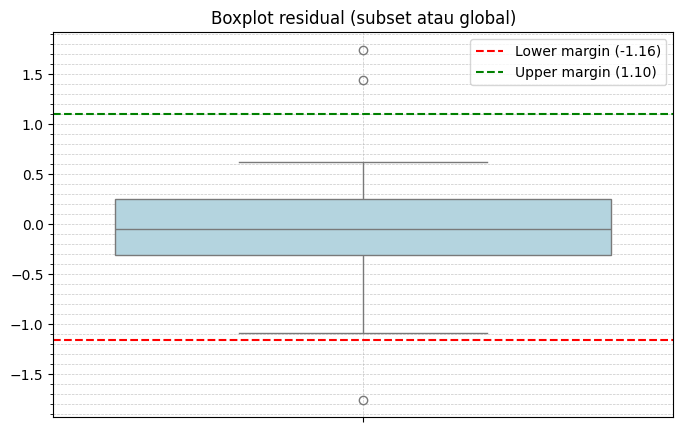

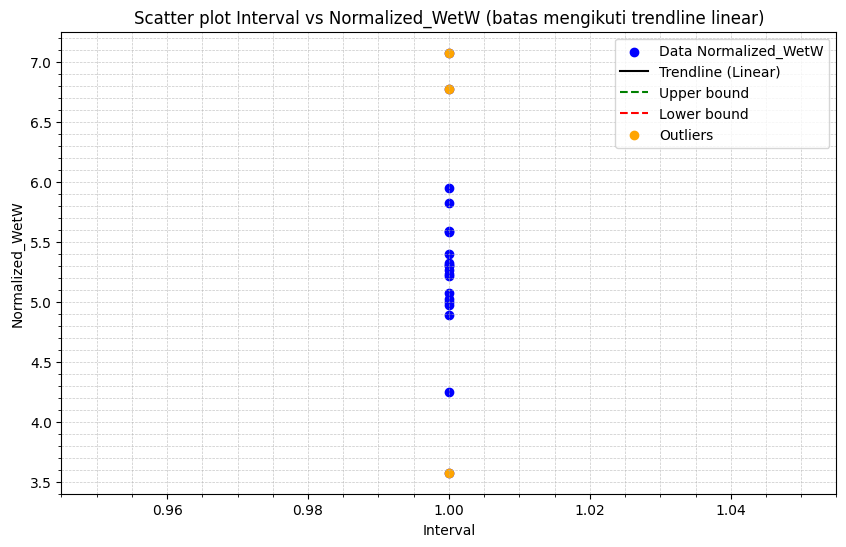

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,5.825,9.270,5.285,BR,None,BRK,BRK,1.985861,1.801764,5.825,5.33025,Normal
354,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.580,6.631,5.210,BR,None,BRK,BRK,1.902336,1.776195,5.580,5.33025,Normal
355,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.025,4.080,4.820,BR,None,BRK,BRK,1.713125,1.643236,5.025,5.33025,Normal
388,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,15.0,16.0,1.0,1.0,5.235,3.629,5.045,BR,None,BRK,BRK,1.784718,1.719943,5.235,5.33025,Normal
390,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,16.0,17.0,1.0,1.0,3.575,1.399,3.525,BR,None,BRK,BRK,1.218790,1.201744,3.575,5.33025,Outlier bawah
425,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.395,3.244,5.220,BR,None,BRK,BRK,1.839265,1.779604,5.395,5.33025,Normal
427,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,2.352,4.775,BR,None,BRK,BRK,1.667101,1.627895,4.890,5.33025,Normal
443,CS8230825RR,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,4.245,5.654,4.005,BR,None,BRK,BRK,1.447207,1.365386,4.245,5.33025,Normal
522,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,5.590,1.610,5.500,BR,None,BRK,BRK,1.905745,1.875062,5.590,5.33025,Normal
523,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,14.0,15.0,1.0,1.0,5.310,2.448,5.180,BR,None,BRK,BRK,1.810287,1.765967,5.310,5.33025,Normal


In [269]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=9, width=0.415375
Sturges -> bins=6, width=0.583333


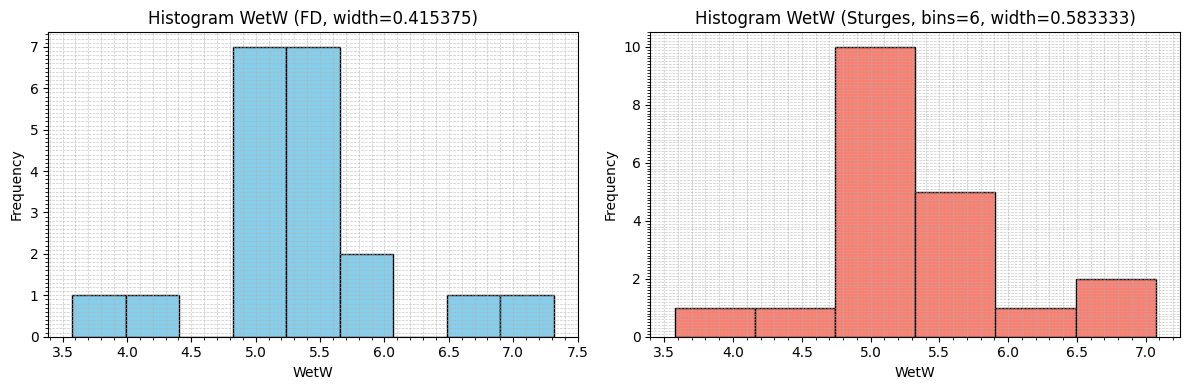


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,3.575000,3.990375,1
1,3.990375,4.405749,1
2,4.405749,4.821124,0
3,4.821124,5.236498,7
4,5.236498,5.651873,7
5,5.651873,6.067247,2
6,6.067247,6.482622,0
7,6.482622,6.897996,1
8,6.897996,7.313371,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,3.575000,4.158333,1
1,4.158333,4.741667,1
2,4.741667,5.325000,10
3,5.325000,5.908333,5
4,5.908333,6.491667,1
5,6.491667,7.075000,2


In [270]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [271]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 4.821124
Masukkan batas atas (<=): 6.067247

Filtered rows (Normal only): 16


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,5.825,9.270,5.285,BR,None,BRK,BRK,1.985861,1.801764,5.825,5.33025
354,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.580,6.631,5.210,BR,None,BRK,BRK,1.902336,1.776195,5.580,5.33025
355,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.025,4.080,4.820,BR,None,BRK,BRK,1.713125,1.643236,5.025,5.33025
388,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,15.0,16.0,1.0,1.0,5.235,3.629,5.045,BR,None,BRK,BRK,1.784718,1.719943,5.235,5.33025
425,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.395,3.244,5.220,BR,None,BRK,BRK,1.839265,1.779604,5.395,5.33025
427,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,2.352,4.775,BR,None,BRK,BRK,1.667101,1.627895,4.890,5.33025
522,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,5.590,1.610,5.500,BR,None,BRK,BRK,1.905745,1.875062,5.590,5.33025
523,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,14.0,15.0,1.0,1.0,5.310,2.448,5.180,BR,None,BRK,BRK,1.810287,1.765967,5.310,5.33025
542,CS8230835,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.325,8.638,4.865,BR,None,BRK,BRK,1.815401,1.658578,5.325,5.33025
544,CS8230835,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.950,6.303,5.575,BR,None,BRK,BRK,2.028476,1.900631,5.950,5.33025


#Filter By MC


Descriptive statistics for H2O:
Count: 16
Mean: 5.063813
Standard Error: 0.633276
Median: 4.702500000000001
Mode: 1.61
Standard Deviation: 2.533102
Sample Variance: 6.416606
Kurtosis: -1.367723
Skewness: 0.220483
Range: 7.659999999999999
Minimum: 1.61
Maximum: 9.27
Sum: 81.021
Confidence Level (95%): ±1.349795

Bin calculation:
Freedman–Diaconis -> bins=5, width=3.175993
Sturges -> bins=5, width=1.532000


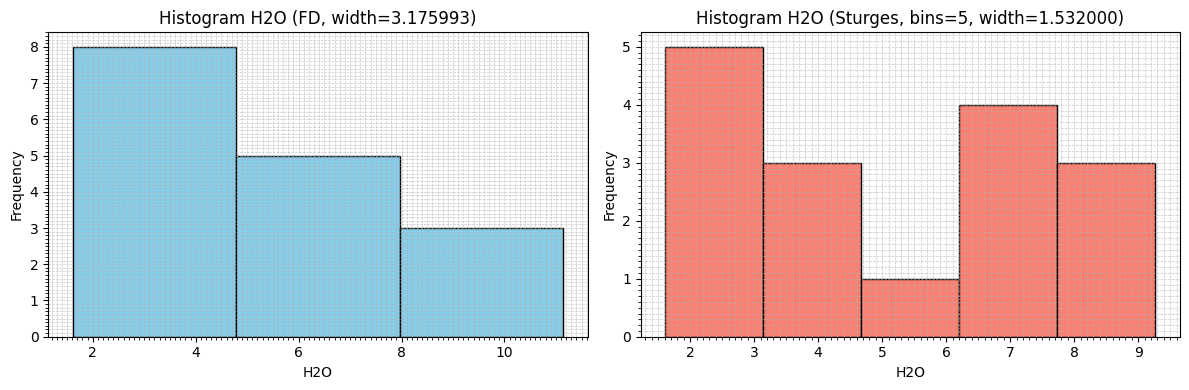


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,1.610000,4.785993,8
1,4.785993,7.961985,5
2,7.961985,11.137978,3



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,1.610,3.142,5
1,3.142,4.674,3
2,4.674,6.206,1
3,6.206,7.738,4
4,7.738,9.270,3


In [272]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [273]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 1.610000
is less than or equal to: 7.961985

Filtered rows (H2O): 13


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
354,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.580,6.631,5.210,BR,None,BRK,BRK,1.902336,1.776195,5.580,5.33025
355,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.025,4.080,4.820,BR,None,BRK,BRK,1.713125,1.643236,5.025,5.33025
388,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,15.0,16.0,1.0,1.0,5.235,3.629,5.045,BR,None,BRK,BRK,1.784718,1.719943,5.235,5.33025
425,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.395,3.244,5.220,BR,None,BRK,BRK,1.839265,1.779604,5.395,5.33025
427,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,2.352,4.775,BR,None,BRK,BRK,1.667101,1.627895,4.890,5.33025
522,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,5.590,1.610,5.500,BR,None,BRK,BRK,1.905745,1.875062,5.590,5.33025
523,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,14.0,15.0,1.0,1.0,5.310,2.448,5.180,BR,None,BRK,BRK,1.810287,1.765967,5.310,5.33025
544,CS8230835,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.950,6.303,5.575,BR,None,BRK,BRK,2.028476,1.900631,5.950,5.33025
739,CS8230889,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.0,9.0,1.0,1.0,4.970,6.740,4.635,BR,None,BRK,BRK,1.694374,1.580166,4.970,5.33025
740,CS8230889,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.0,8.0,1.0,1.0,5.000,7.300,4.635,BR,None,BRK,BRK,1.704602,1.580166,5.000,5.33025


# Filter By DTF


Descriptive statistics for DTF:
Count: 13
Mean: 1.722303
Standard Error: 0.028644
Median: 1.750626015
Mode: 1.580165838
Standard Deviation: 0.103276
Sample Variance: 0.010666
Kurtosis: -0.960885
Skewness: 0.157924
Range: 0.3204651329999999
Minimum: 1.580165838
Maximum: 1.900630971
Sum: 22.389944215
Confidence Level (95%): ±0.062409

Bin calculation:
Freedman–Diaconis -> bins=5, width=0.118892
Sturges -> bins=5, width=0.064093


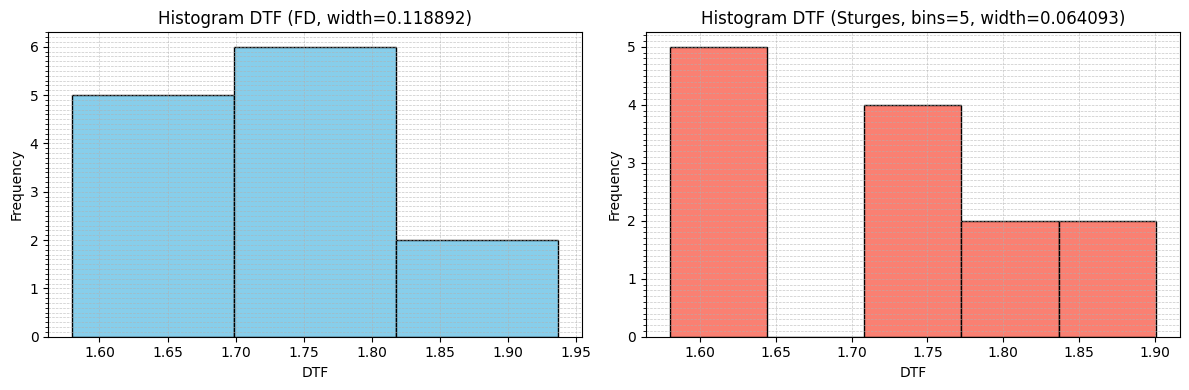


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,1.580166,1.699058,5
1,1.699058,1.817950,6
2,1.817950,1.936842,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,1.580166,1.644259,5
1,1.644259,1.708352,0
2,1.708352,1.772445,4
3,1.772445,1.836538,2
4,1.836538,1.900631,2


In [274]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [275]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(89))

is greater than or equal to: 1.580166
is less than or equal to: 1.817950

Filtered rows (DTF): 9


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
354,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.580,6.631,5.210,BR,None,BRK,BRK,1.902336,1.776195,5.580,5.33025
355,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.025,4.080,4.820,BR,None,BRK,BRK,1.713125,1.643236,5.025,5.33025
388,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,15.0,16.0,1.0,1.0,5.235,3.629,5.045,BR,None,BRK,BRK,1.784718,1.719943,5.235,5.33025
425,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,5.395,3.244,5.220,BR,None,BRK,BRK,1.839265,1.779604,5.395,5.33025
427,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,2.352,4.775,BR,None,BRK,BRK,1.667101,1.627895,4.890,5.33025
523,CS8230833,Belambus Blok 1 Spasi 100,Belambus_Selatan,14.0,15.0,1.0,1.0,5.310,2.448,5.180,BR,None,BRK,BRK,1.810287,1.765967,5.310,5.33025
787,CS8230895,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.265,2.279,5.145,BR,None,BRK,BRK,1.794946,1.754035,5.265,5.33025
809,CS8230897,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,5.295,3.022,5.135,BR,None,BRK,BRK,1.805173,1.750626,5.295,5.33025
811,CS8230897,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.0,10.0,1.0,1.0,5.070,5.325,4.800,BR,None,BRK,BRK,1.728466,1.636418,5.070,5.33025


# SUMMARY

In [276]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 9
Mean: 1.000000
Standard Error: 0.000000
Median: 1.0
Mode: 1.0
Standard Deviation: 0.000000
Sample Variance: 0.000000
Kurtosis: N/A
Skewness: N/A
Range: 0.0
Minimum: 1.0
Maximum: 1.0
Sum: 9.0
Confidence Level (95%): ±0.000000

Descriptive statistics for CoreRec:
Count: 9
Mean: 1.000000
Standard Error: 0.000000
Median: 1.0
Mode: 1.0
Standard Deviation: 0.000000
Sample Variance: 0.000000
Kurtosis: N/A
Skewness: N/A
Range: 0.0
Minimum: 1.0
Maximum: 1.0
Sum: 9.0
Confidence Level (95%): ±0.000000

Descriptive statistics for WetW:
Count: 9
Mean: 5.229444
Standard Error: 0.069204
Median: 5.265
Mode: 4.89
Standard Deviation: 0.207612
Sample Variance: 0.043103
Kurtosis: -0.609277
Skewness: -0.048058
Range: 0.6900000000000004
Minimum: 4.89
Maximum: 5.58
Sum: 47.065
Confidence Level (95%): ±0.159585

Descriptive statistics for H2O:
Count: 9
Mean: 3.667778
Standard Error: 0.492202
Median: 3.244
Mode: 2.279
Standard Deviation: 1.476607
Sample Variance: 

/tmp/ipython-input-1308544473.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = stats.kurtosis(data) if n > 3 else np.nan
/tmp/ipython-input-1308544473.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(data) if n > 2 else np.nan


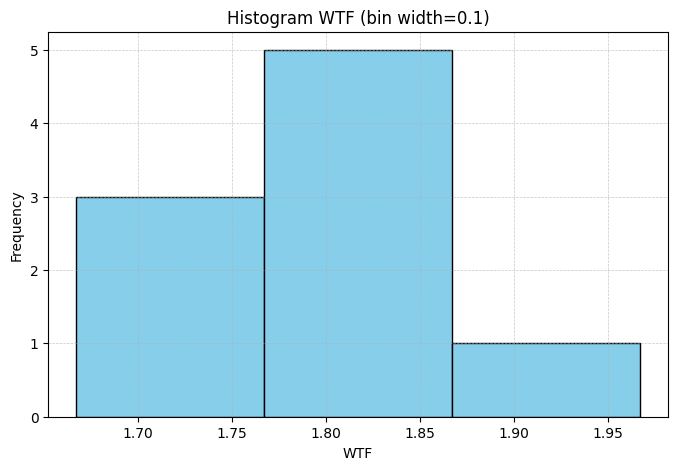


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,1.667101,1.767101,3
1,1.767101,1.867101,5
2,1.867101,1.967101,1


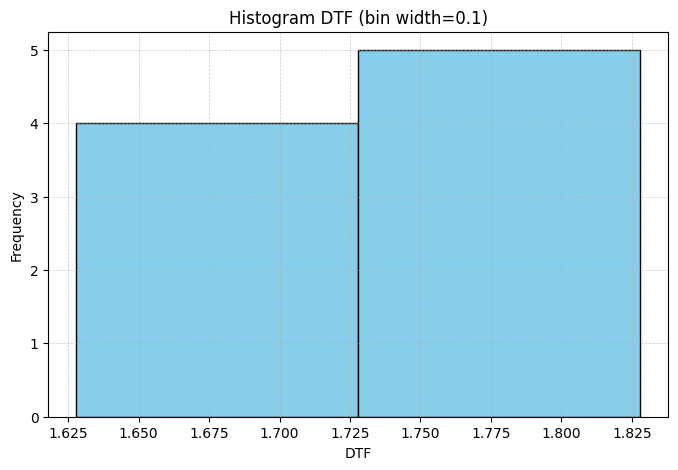


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,1.627895,1.727895,4
1,1.727895,1.827895,5


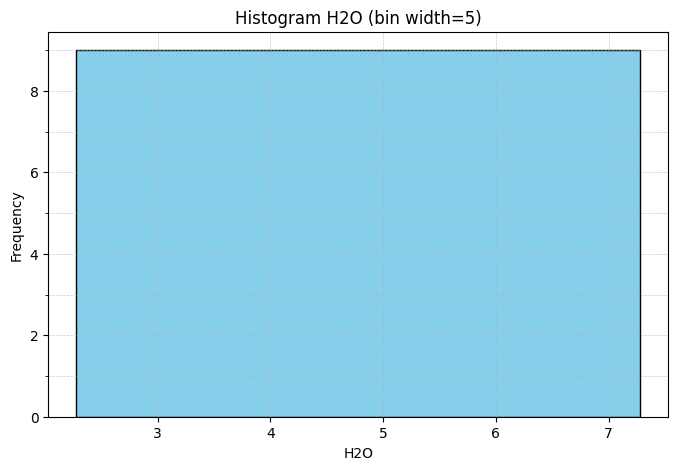


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,2.279,7.279,9


In [277]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [278]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Belambus Selatan
Masukkan GEN_LYR: BRK
Masukkan Material: BR

Tabel Ringkasan tersimpan sebagai variabel: df_belambus_selatan_brk_br


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,BRK,BR,1.0,1.0,5.229444,3.667778,5.036667,1.782824,1.717102


# Proporsional Averaging

In [ ]:
import pandas as pd

# Gabungkan semua DataFrame jadi satu
df_belambus_selatan_sapx_all = pd.concat([
    df_belambus_selatan_sapx_esap,
    df_belambus_selatan_sapx_lim,
    df_belambus_selatan_sapx_rlim,
    df_belambus_selatan_sapx_rsap,
    df_belambus_selatan_sapx_sap,
    df_belambus_selatan_sapx_ylim
], ignore_index=True)

# Cek hasil
print(df_belambus_selatan_sapx_all.shape)
display(df_belambus_selatan_sapx_all.head())

(6, 10)


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,SAPX,ESAP,0.800,1.0,4.24375,6.03725,3.9925,1.879810,1.772542
1,Belambus Selatan,SAPX,Lim,0.865,1.0,4.88250,23.34850,3.7500,1.960864,1.493441
2,Belambus Selatan,SAPX,RLIM,1.000,1.0,3.51000,30.05700,2.4550,1.196630,0.836959
3,Belambus Selatan,SAPX,RSAP,0.800,1.0,2.30000,17.88400,1.8975,0.989237,0.811675
4,Belambus Selatan,SAPX,SAP,0.638,1.0,3.43000,21.89420,2.6730,1.995141,1.561921


In [ ]:
# Daftar material yang memang ada di hasil filter
materials_filter = df_belambus_selatan_sapx_all['Material'].unique().tolist()

# Initialize df_raw with the df_block DataFrame
df_raw = df_block.copy()

# Filter raw data hanya untuk material yang relevan
df_raw_filtered = df_raw[df_raw['Material'].isin(materials_filter)]

# Hitung jumlah raw per material
raw_counts = df_raw_filtered['Material'].value_counts().reset_index()
raw_counts.columns = ['Material', 'Raw_Count']

# Hitung jumlah hasil filter per material
filtered_counts = df_belambus_selatan_sapx_all['Material'].value_counts().reset_index()
filtered_counts.columns = ['Material', 'Filtered_Count']

# Gabungkan
summary = pd.merge(raw_counts, filtered_counts, on='Material', how='inner')

# Hitung persentase proporsi tiap material terhadap total raw relevan
summary['Percentage_of_Total'] = (summary['Raw_Count'] / summary['Raw_Count'].sum()) * 100

print("\nSummary per Material (hanya material relevan):")
display(summary)


Summary per Material (hanya material relevan):


,Material,Raw_Count,Filtered_Count,Percentage_of_Total
0,YLIM,189,1,31.552588
1,Lim,128,1,21.368948
2,SAP,89,1,14.858097
3,ESAP,85,1,14.190317
4,RLIM,80,1,13.355593
5,RSAP,28,1,4.674457


In [ ]:
import numpy as np
import pandas as pd

# --- 1. Buat mapping material -> proporsi (dari summary yang sudah dihitung sebelumnya) ---
weights_map = summary.set_index('Material')['Percentage_of_Total'] / 100.0

# --- 2. Fungsi untuk weighted descriptive statistics ---
def weighted_means(df, weights_map):
    stats = {}
    for col in ['Interval_mean','CoreRec_mean','WetW_mean','H2O_mean','DryW_mean','WTF_mean','DTF_mean']:
        values = df[col].values
        # Ambil bobot sesuai material tiap baris
        w = df['Material'].map(weights_map).values

        # Weighted mean
        mean = np.average(values, weights=w)

        # Simpan hasil
        stats[col] = mean

    return pd.DataFrame([stats])

# --- 3. Hitung descriptive statistics proporsional ---
summary_means = weighted_means(df_belambus_selatan_sapx_all, weights_map)

print("\nDescriptive Statistics Proporsional (Material LIM, Weighted Means):")
display(summary_means)


Descriptive Statistics Proporsional (Material LIM, Weighted Means):


,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,0.721873,1.0,3.48794,21.150928,2.763764,1.70237,1.348941
